In [1]:
import pandas as pd
import numpy as np

In [2]:
pop = pd.read_csv("dataset/cleaned_population.csv")
death_rate = pd.read_csv("dataset/death_rate.csv")
opioids = pd.read_csv("dataset/opioids_clean.csv")

In [3]:
# Additional data cleaning before merge
## Additional treatment for overdose deaths dataset
death_rate["state"] = death_rate["state"].str.lstrip()
death_rate["county"] = death_rate["county"].str.rstrip()

death_rate = death_rate[(death_rate["state"] != "DC") | (death_rate["state"] != "AK")]

death_rate = death_rate.loc[death_rate['Deaths']!='Missing']

## Additional treatment for population dataset
pop = pop[(pop["Year"]>=2003) & (pop["Year"] <= 2015)]

In [4]:
# Change the data type of death_rate.Deaths, str to float
death_rate.Deaths = death_rate.Deaths.astype(float)

In [5]:
opioids_year = opioids.groupby(["Year","state"]).sum()['weight'].reset_index()
death_year = death_rate.groupby(["Year","state"]).sum()['Deaths'].reset_index()
pop_year = pop.groupby(["Year","state"]).sum()['total_population'].reset_index()

In [6]:
# Merge
pop_opi = pop_year.merge(opioids_year, on = ["Year", "state"], how = "left")
final = pop_opi.merge(death_year, on = ["state", "Year"], how = "left")

In [7]:
final

,Year,state,total_population,weight,Deaths
0,2003,AL,4490591,NaN,73.0
1,2003,AR,2722291,NaN,NaN
2,2003,AZ,5591206,NaN,484.0
3,2003,CA,35251107,NaN,2316.0
4,2003,CO,4548775,NaN,262.0
...,...,...,...,...,...
632,2015,VT,625197,NaN,56.0
633,2015,WA,7163543,NaN,822.0
634,2015,WI,5761406,NaN,612.0
635,2015,WV,1841996,NaN,544.0


In [8]:
final['opioid_per_cap'] = round(final['weight']/final['total_population'],2)
final['mortality_rate_in_100k'] = round(final['Deaths']/final['total_population']*100000,2)

In [9]:
final

,Year,state,total_population,weight,Deaths,opioid_per_cap,mortality_rate_in_100k
0,2003,AL,4490591,NaN,73.0,NaN,1.63
1,2003,AR,2722291,NaN,NaN,NaN,NaN
2,2003,AZ,5591206,NaN,484.0,NaN,8.66
3,2003,CA,35251107,NaN,2316.0,NaN,6.57
4,2003,CO,4548775,NaN,262.0,NaN,5.76
...,...,...,...,...,...,...,...
632,2015,VT,625197,NaN,56.0,NaN,8.96
633,2015,WA,7163543,NaN,822.0,NaN,11.47
634,2015,WI,5761406,NaN,612.0,NaN,10.62
635,2015,WV,1841996,NaN,544.0,NaN,29.53


### Plot

In [21]:
state_list = ['AL','AZ','AR','CA','CO','CT','DE','DC','FL','HI','GA','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI',
             'MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NV','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT',
              'VT','VA','WA','WV','WI','WY']

In [22]:
northeast = ['CT','ME','MA','NH','RI','VT','NJ','NY','PA']
midwest = ['IL','IN','MI','OH','WI','IA','KS','MN','MO','NE','ND','SD']
south = ['DE','FL','GA','MD','NC','SC','VA','WV','AL','KY','MS','TN','AR','LA','OK','TX']
west = ['AZ','CO','ID','MT','NV','NM','UT','WY','CA','HI','OR','WA']

In [23]:
# Florida, prescriptions
from plotnine import *

FL = final.loc[final['state']=='FL']

ImportError: DLL load failed while importing _arpack: The specified procedure could not be found.

In [12]:
import matplotlib.pyplot as plt

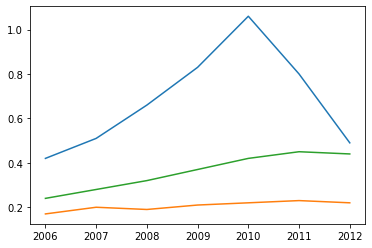

In [18]:
plt.plot(final[final.state == "FL"].Year, final[final.state == "FL"].opioid_per_cap )
plt.plot(final[final.state == "TX"].Year, final[final.state == "TX"].opioid_per_cap )
plt.plot(final[final.state == "NM"].Year, final[final.state == "NM"].opioid_per_cap )

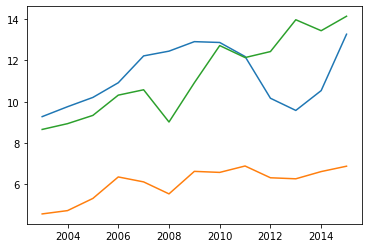

In [20]:
plt.plot(final[final.state == "FL"].Year, final[final.state == "FL"].mortality_rate_in_100k)
plt.plot(final[final.state == "TX"].Year, final[final.state == "TX"].mortality_rate_in_100k)
plt.plot(final[final.state == "AZ"].Year, final[final.state == "AZ"].mortality_rate_in_100k)

ImportError: DLL load failed while importing _arpack: The specified procedure could not be found.